<a href="https://colab.research.google.com/github/Bendidi/My_python/blob/main/AR_data_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install necessary libraries (if not already installed in Colab)

In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install nltk

# Step 2: Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import pickle
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords

In [49]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Step 3: Define Arabic stopwords then load and shuffle the dataset

In [4]:
arabic_stopwords = set(stopwords.words('arabic'))

In [5]:
dataset_balanced = pd.read_csv('balanced_ar_dataset.csv', encoding='utf-8-sig')

In [6]:
dataset_balanced = shuffle(dataset_balanced, random_state=11)

# Step 7: Clean Arabic text (remove non-Arabic characters, tokenize, and remove stopwords)

In [7]:
def clean_arabic(text):
    text = re.sub(r'[^\u0600-\u06FF\s]', '', str(text))  # Keep only Arabic characters and spaces
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    tokens_clean = [token for token in tokens if token not in arabic_stopwords]  # Remove stopwords
    return ' '.join(tokens_clean)

In [8]:
dataset_balanced['Review'] = dataset_balanced['Review'].apply(lambda x: clean_arabic(x))

# Step 8: Prepare data for ML models (Tokenizer)

In [9]:
X_balanced = dataset_balanced['Review']
y_balanced = dataset_balanced['Label']

In [1]:
from sklearn.preprocessing import LabelEncoder
# Convert labels in 'y_balanced' to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_balanced = label_encoder.fit_transform(y_balanced)

NameError: name 'y_balanced' is not defined

In [19]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=11)

In [20]:
vectorizer_b = TfidfVectorizer()
X_train_vector_b = vectorizer_b.fit_transform(X_train_b)
X_test_vector_b = vectorizer_b.transform(X_test_b)

# Step 9: Train classifiers on the balanced dataset

In [2]:
# SVM Classifier
svc_classifier_b = SVC(kernel='linear', C=1.0, random_state=0)
svc_classifier_b.fit(X_train_vector_b, y_train_b)

NameError: name 'SVC' is not defined

In [23]:
y_pred_svc_b = svc_classifier_b.predict(X_test_vector_b)
print('Balanced SVC:\n', classification_report(y_test_b, y_pred_svc_b))

Balanced SVC:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4289
           1       0.92      0.93      0.92      4128

    accuracy                           0.92      8417
   macro avg       0.92      0.92      0.92      8417
weighted avg       0.92      0.92      0.92      8417



In [24]:
# Naive Bayes Classifier
nb_classifier_b = MultinomialNB()
nb_classifier_b.fit(X_train_vector_b, y_train_b)

MultinomialNB()

In [25]:
y_pred_nb_b = nb_classifier_b.predict(X_test_vector_b)
print('Balanced Naive Bayes:\n', classification_report(y_test_b, y_pred_nb_b))

Balanced Naive Bayes:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      4289
           1       0.91      0.86      0.89      4128

    accuracy                           0.89      8417
   macro avg       0.89      0.89      0.89      8417
weighted avg       0.89      0.89      0.89      8417



In [26]:
# Decision Tree Classifier
dt_classifier_b = DecisionTreeClassifier(random_state=0)
dt_classifier_b.fit(X_train_vector_b, y_train_b)

DecisionTreeClassifier(random_state=0)

In [27]:
y_pred_dt_b = dt_classifier_b.predict(X_test_vector_b)
print('Balanced Decision Tree:\n', classification_report(y_test_b, y_pred_dt_b))

Balanced Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4289
           1       0.86      0.86      0.86      4128

    accuracy                           0.86      8417
   macro avg       0.86      0.86      0.86      8417
weighted avg       0.86      0.86      0.86      8417



In [28]:
# Random Forest Classifier
rf_classifier_b = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier_b.fit(X_train_vector_b, y_train_b)

RandomForestClassifier(random_state=0)

In [29]:
y_pred_rf_b = rf_classifier_b.predict(X_test_vector_b)
print('Balanced Random Forest:\n', classification_report(y_test_b, y_pred_rf_b))

Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4289
           1       0.90      0.92      0.91      4128

    accuracy                           0.91      8417
   macro avg       0.91      0.91      0.91      8417
weighted avg       0.91      0.91      0.91      8417



In [30]:
# K-Nearest Neighbors Classifier
knn_classifier_b = KNeighborsClassifier(n_neighbors=5)
knn_classifier_b.fit(X_train_vector_b, y_train_b)

KNeighborsClassifier()

In [31]:
y_pred_knn_b = knn_classifier_b.predict(X_test_vector_b)
print('Balanced KNN:\n', classification_report(y_test_b, y_pred_knn_b))

Balanced KNN:
               precision    recall  f1-score   support

           0       0.57      0.45      0.51      4289
           1       0.53      0.65      0.58      4128

    accuracy                           0.55      8417
   macro avg       0.55      0.55      0.55      8417
weighted avg       0.55      0.55      0.54      8417



In [32]:
!pip install tensorflow

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

# Step 10: Prepare data for LSTM (Tokenizer)

In [34]:
# Tokenize and pad sequences for LSTM
max_words = 30000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_b)

X_train_seq = tokenizer.texts_to_sequences(X_train_b)
X_test_seq = tokenizer.texts_to_sequences(X_test_b)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [35]:
# Step 9: Define the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Bidirectional(LSTM(64)))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
# Step 10: Train the LSTM model
history = model_lstm.fit(X_train_pad, y_train_b, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_b))

Epoch 1/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 823s 2s/step - accuracy: 0.8121 - loss: 0.3718 - val_accuracy: 0.9298 - val_loss: 0.1852
Epoch 2/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 835s 2s/step - accuracy: 0.9602 - loss: 0.1191 - val_accuracy: 0.9285 - val_loss: 0.2069
Epoch 3/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 822s 2s/step - accuracy: 0.9774 - loss: 0.0713 - val_accuracy: 0.9272 - val_loss: 0.2472
Epoch 4/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.9867 - loss: 0.0401 - val_accuracy: 0.9175 - val_loss: 0.3068
Epoch 5/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9189 - val_loss: 0.3226


In [37]:
# Step 11: Evaluate the LSTM model
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test_pad, y_test_b, verbose=0)
print(f'LSTM Accuracy: {lstm_accuracy*100:.2f}%')

LSTM Accuracy: 91.89%


In [42]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_cnn.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

In [43]:
# Compile the CNN model
model_cnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [44]:
#  Train both the CNN model
print("Training CNN model...")
cnn_history = model_cnn.fit(X_train_pad, y_train_b, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_b))

Training CNN model...
Epoch 1/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 102s 190ms/step - accuracy: 0.7912 - loss: 0.3921 - val_accuracy: 0.9319 - val_loss: 0.1857
Epoch 2/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 139s 185ms/step - accuracy: 0.9621 - loss: 0.1150 - val_accuracy: 0.9259 - val_loss: 0.2045
Epoch 3/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 97s 185ms/step - accuracy: 0.9804 - loss: 0.0618 - val_accuracy: 0.9154 - val_loss: 0.3003
Epoch 4/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 96s 182ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9118 - val_loss: 0.3861
Epoch 5/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 144s 185ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9134 - val_loss: 0.4785


In [46]:
#Evaluate CNN model on the test data
cnn_loss, cnn_accuracy = model_cnn.evaluate(X_test_pad, y_test_b, verbose=0)
print(f'CNN Accuracy: {cnn_accuracy*100:.2f}%')

CNN Accuracy: 91.34%


In [47]:
# Step 14: Plot the accuracy of each model, including LSTM
accuracy_svc = accuracy_score(y_test_b, y_pred_svc_b) * 100
accuracy_nb = accuracy_score(y_test_b, y_pred_nb_b) * 100
accuracy_dt = accuracy_score(y_test_b, y_pred_dt_b) * 100
accuracy_rf = accuracy_score(y_test_b, y_pred_rf_b) * 100
accuracy_knn = accuracy_score(y_test_b, y_pred_knn_b) * 100
accuracy_lstm = lstm_accuracy * 100
accuracy_cnn = cnn_accuracy*100

model_names = ['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'LSTM', 'CNN']
accuracies = [accuracy_svc, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_lstm, accuracy_cnn]

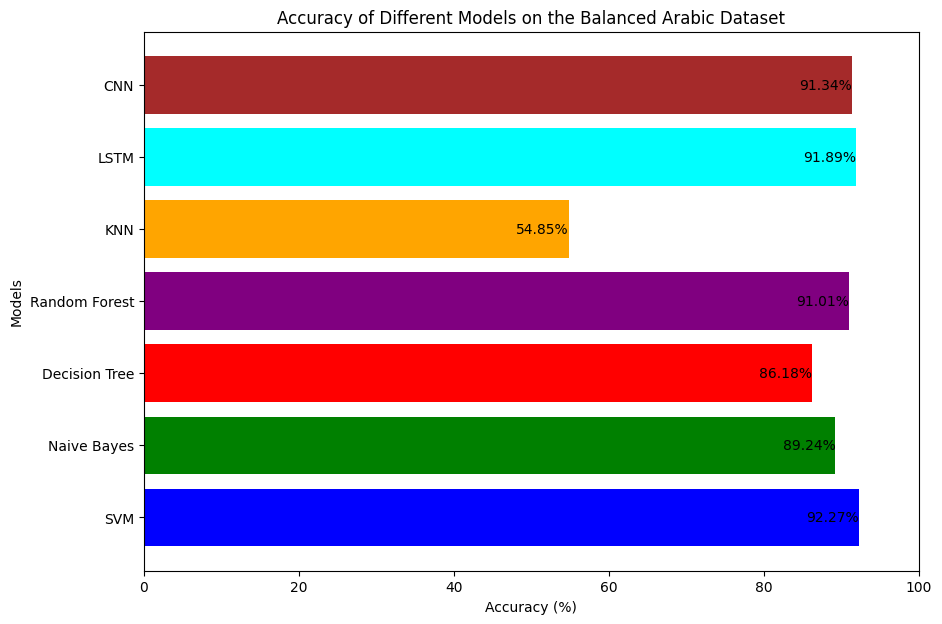

In [48]:
plt.figure(figsize=(10, 7))
plt.barh(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown'])
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Accuracy of Different Models on the Balanced Arabic Dataset')
plt.xlim(0, 100)
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='right', color='black')
plt.show()